# Developing Simple 3-Layer Neural Network.

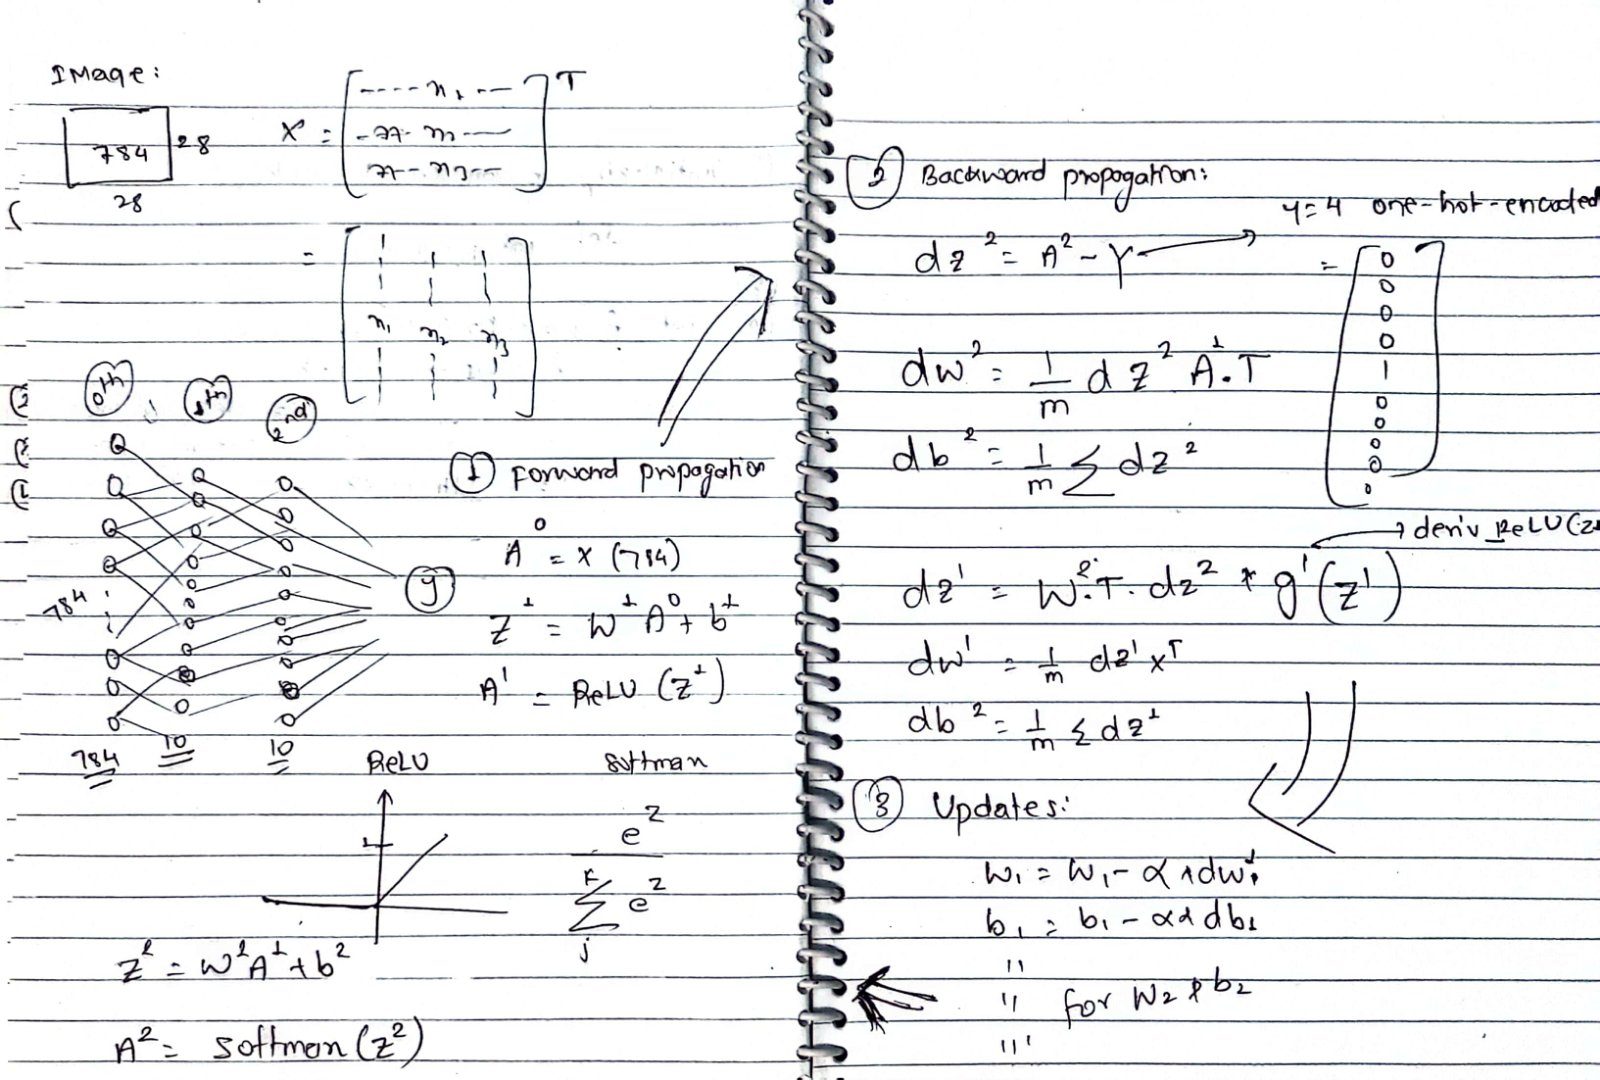

In [1]:
from PIL import Image
Image.open("neural.jpg")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import the data
data = pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
np.random.seed(42)
data = data.sample(frac=1)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=np.array(data)
data

array([[8, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
m,n = data.shape
data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255


In [8]:
data_train.shape,data_dev.shape

((785, 41000), (785, 1000))

In [9]:
data_dev.shape,x_dev.shape

((785, 1000), (784, 1000))

In [10]:
def init_params():
    w1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1)-0.5
    w2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def ReLU(z):
    return np.maximum(z,0)

def softmax(z):
    return np.exp(z)/sum(np.exp(z))
    
def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x)+b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1)+b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
    
def one_hot(y):
    one_hot_y = np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_ReLU(z):
    return z>0
    
def backprop(z1,a1,z2,a2,w1,w2,x,y,m):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1/m)*dz2.dot(a1.T)
    db2 = (1/m)*np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = (1/m)*dz1.dot(x.T)
    db1 = (1/m)*np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1 
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2

def get_predictions(a2):
    return np.argmax(a2,0)
def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x,y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        m = x.shape[1]
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = backprop(z1,a1,z2,a2,w1,w2,x,y,m)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i %10==0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(a2),y))
    return w1,b1,w2,b2

In [11]:
w1,b1,w2,b2 = gradient_descent(x_train,y_train,200,0.3)

Iteration:  0
[0 2 0 ... 1 2 1] [2 6 4 ... 2 6 0]
Accuracy:  0.08734146341463414
Iteration:  10
[2 2 7 ... 7 2 0] [2 6 4 ... 2 6 0]
Accuracy:  0.3036341463414634
Iteration:  20
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
Accuracy:  0.4318292682926829
Iteration:  30
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
Accuracy:  0.5427804878048781
Iteration:  40
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
Accuracy:  0.6127560975609756
Iteration:  50
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.6642439024390244
Iteration:  60
[2 6 9 ... 9 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.661609756097561
Iteration:  70
[2 6 9 ... 9 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.7025121951219512
Iteration:  80
[2 6 9 ... 9 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.7285365853658536
Iteration:  90
[2 6 9 ... 9 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.7485853658536585
Iteration:  100
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.7650975609756098
Iteration:  110
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
Accuracy:  0.7792439024390244
Iteration:  120
[2 6 9 ... 

83% accuracy in training set

In [12]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index,w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


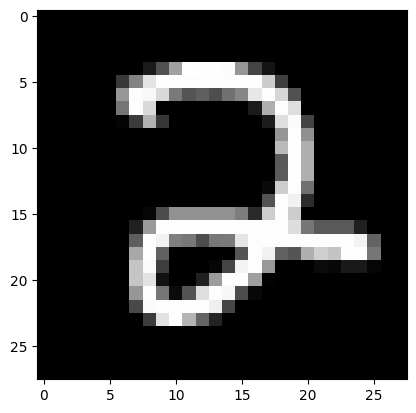

Prediction:  [6]
Label:  6


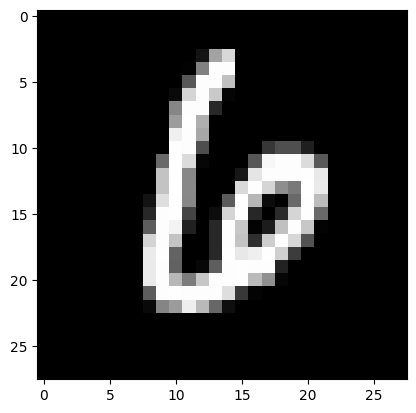

Prediction:  [4]
Label:  4


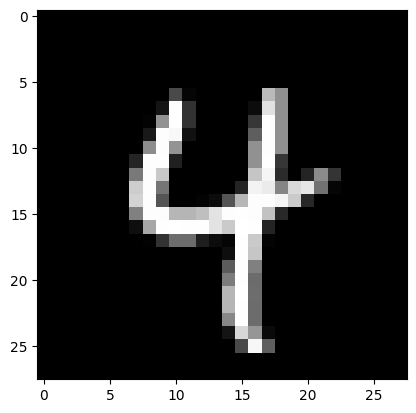

Prediction:  [8]
Label:  8


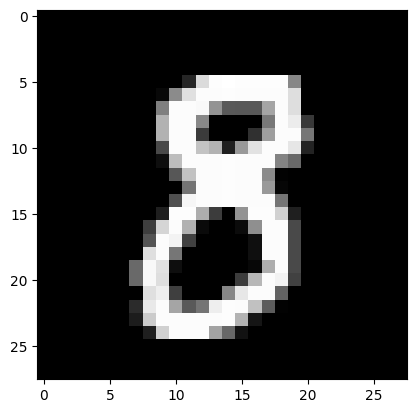

In [13]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [14]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 2 6 4 5 0 2 6 0 0 0 8 6 3 8 6 1 2 8 6 7
 8 6 1 9 7 0 6 8 3 4 2 7 8 4 3 3 7 1 2 2 2 9 6 6 0 8 8 2 8 4 3 9 3 9 4 2 8
 1 6 8 7 0 3 1 7 6 7 6 1 9 5 3 6 4 3 7 6 6 5 2 4 3 5 4 8 0 4 1 1 1 2 8 9 8
 1 4 7 1 0 3 6 9 2 1 9 7 3 9 6 5 7 1 0 6 5 6 4 2 0 8 9 9 4 2 3 6 4 0 9 4 1
 7 7 1 6 8 1 7 6 6 5 7 9 7 0 7 9 9 1 3 6 5 8 7 1 6 7 0 9 3 0 8 6 0 1 9 9 2
 3 7 2 6 6 2 8 9 6 6 7 4 5 5 6 3 1 5 3 7 9 9 0 7 4 7 5 1 1 0 2 5 3 8 1 3 9
 3 6 7 3 1 3 4 4 0 2 7 1 4 8 1 0 6 3 9 8 7 6 5 7 0 5 7 9 7 1 7 7 4 5 2 8 9
 5 2 6 4 1 8 8 0 6 8 9 5 6 6 6 1 0 6 3 1 9 9 0 8 3 4 7 7 2 3 1 8 2 6 1 5 1
 0 0 5 2 5 6 9 6 7 1 1 3 7 3 2 5 1 8 3 1 2 1 3 9 7 2 7 8 2 7 0 3 9 4 0 1 6
 9 2 6 2 8 3 0 3 3 0 7 0 0 6 8 7 4 7 1 8 1 0 0 6 1 5 7 3 9 9 3 3 3 8 9 2 1
 0 7 7 8 0 2 5 9 0 8 7 0 0 4 8 8 7 2 1 7 0 7 6 1 4 7 6 2 1 2 4 6 1 1 8 2 0
 8 4 9 3 1 7 4 1 2 7 9 7 4 1 2 0 9 0 3 2 3 0 7 9 8 6 8 4 1 8 8 8 6 0 9 6 6
 3 7 3 2 4 5 5 3 1 8 7 7 4 8 4 8 6 3 6 0 6 8 8 8 4 0 0 7 8 7 2 7 5 1 0 8 1
 3 0 1 3 1 1 6 6 2 1 7 2 

0.844

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
housing = fetch_california_housing()
x_train,x_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2)
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
rmse = mean_squared_error(y_test,y_pred,squared=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
rmse

0.5127446348967559